# ==== INTERACTIVE CLUSTERING : COMPUTATION TIME STUDY ====
> ### Stage 4 : Plot some figures according to previous stages.

-----

## READ-ME BEFORE RUNNING

### Quick Description

This notebook is **aimed at plot several figures according to previous analyses**.
- Environments are represented by subdirectories in the `/experiments` folder. A full path to an experiment environment is `/experiments/[TASK]/[DATASET]/[ALGORITHM]/`.
- Experiments have to be run and evaluated in order to analyze convergency speed.

Before running, **run the notebook `3_Analyze_main_effects_and_post_hoc.ipynb` to run main effects and and post-hoc analysis on interactive clustering convergence speed over experiments.**.

### Description each steps

1. First section is aimed at display computation time for several combinations of algorithm and parameters.

-----

## 1. Create some graphs for PhD report

***WARNING***: _Start by launching the experiment runs before this section !_

Import Python dependencies.

In [39]:
from typing import Dict, List, Optional, Tuple, Union
import listing_envs
import json
import math
import numpy
import openpyxl
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from scipy import stats as scipystats

Display error bars ?

In [40]:
with_error_bars = True

Find all experiment environments.

Case of _preprocessing_
> - algorithms: `simple_prep`, `lemma_prep`, `filter_prep`
> - factors: `dataset_size`

In [41]:
df_preprocessing = pd.read_csv("../results/experiments_synthesis_for_preprocessing.csv", sep=";")
df_preprocessing["time_total"] = df_preprocessing["time_total"].str.replace(",", ".").astype(float)
df_preprocessing.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,algorithm_name,algorithm_random_seed,time_start,time_stop,time_total
0,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,1,1668606138,1668606148,10.645489
1,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,2,1668606138,1668606148,10.604682
2,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,3,1668606148,1668606155,6.896929
3,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,4,1668606148,1668606155,6.832410
4,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,5,1668606148,1668606155,6.849232


In [42]:
computation_time_of_preprocessing_by_dataset_size = {}
for preprocessing_algo_name in {"simple_prep", "lemma_prep", "filter_prep"}:
    df_preprocessing_by_algo = df_preprocessing[df_preprocessing["algorithm_name"]==preprocessing_algo_name]
    dataset_sizes = sorted(df_preprocessing_by_algo["dataset_size"].unique().tolist())
    computation_time_of_preprocessing_by_dataset_size[preprocessing_algo_name] = {}
    for dataset_size in dataset_sizes:
        df_preprocessing_by_algo_by_size = df_preprocessing_by_algo[df_preprocessing_by_algo["dataset_size"]==dataset_size]
        computation_time_of_preprocessing_by_dataset_size[preprocessing_algo_name][dataset_size] = {}
        computation_time_of_preprocessing_by_dataset_size[preprocessing_algo_name][dataset_size]["MEAN"] = numpy.mean( df_preprocessing_by_algo_by_size["time_total"].tolist() )
        computation_time_of_preprocessing_by_dataset_size[preprocessing_algo_name][dataset_size]["SEM"] = scipystats.sem( df_preprocessing_by_algo_by_size["time_total"].tolist() )

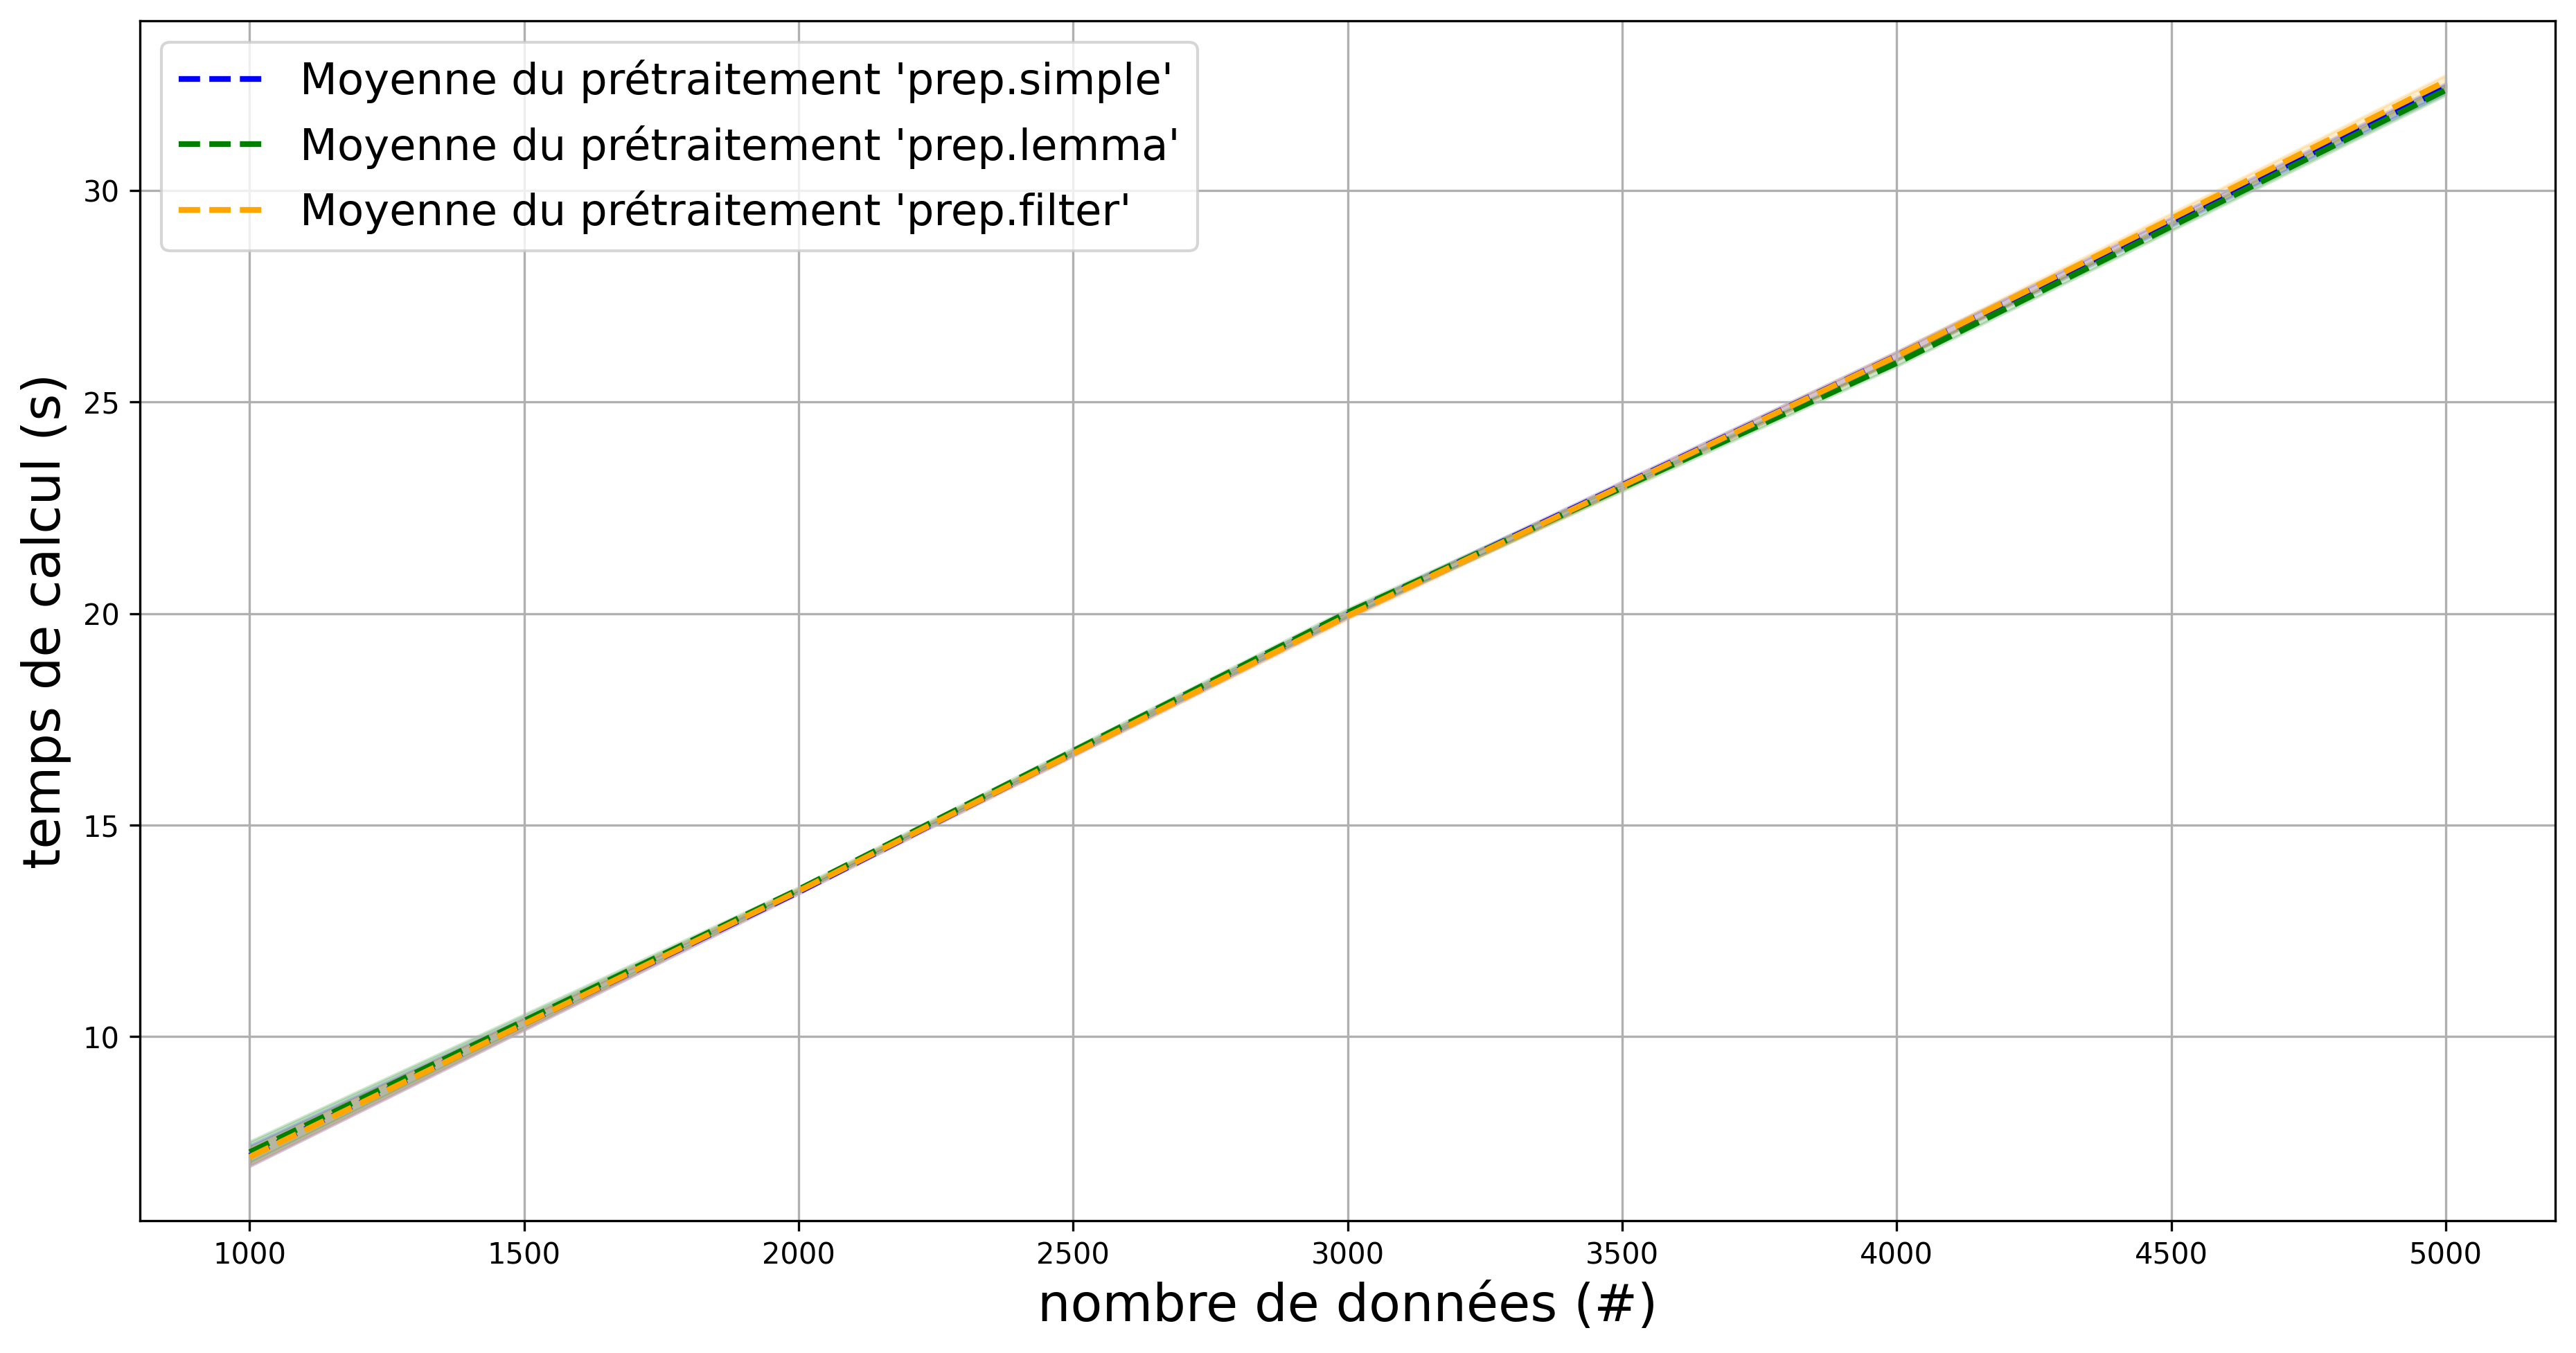

In [43]:
# Create a new figure.
fig_plot_preprocessing: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_preprocessing = fig_plot_preprocessing.gca()

# Plot computation time for simple_prep.
list_of_x = sorted(computation_time_of_preprocessing_by_dataset_size["simple_prep"].keys())
axis_plot_preprocessing.plot(
    list_of_x,  # x
    [computation_time_of_preprocessing_by_dataset_size["simple_prep"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du prétraitement 'prep.simple'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
axis_plot_preprocessing.fill_between(
    x=list_of_x,  # x
    y1=[(computation_time_of_preprocessing_by_dataset_size["simple_prep"][x]["MEAN"] - computation_time_of_preprocessing_by_dataset_size["simple_prep"][x]["SEM"]) for x in list_of_x],  # y1
    y2=[(computation_time_of_preprocessing_by_dataset_size["simple_prep"][x]["MEAN"] + computation_time_of_preprocessing_by_dataset_size["simple_prep"][x]["SEM"]) for x in list_of_x],  # y2
    color="blue",
    alpha=0.2,
)

# Plot computation time for lemma_prep.
list_of_x = sorted(computation_time_of_preprocessing_by_dataset_size["lemma_prep"].keys())
axis_plot_preprocessing.plot(
    list_of_x,  # x
    [computation_time_of_preprocessing_by_dataset_size["lemma_prep"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du prétraitement 'prep.lemma'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_preprocessing.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_preprocessing_by_dataset_size["lemma_prep"][x]["MEAN"] - computation_time_of_preprocessing_by_dataset_size["lemma_prep"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_preprocessing_by_dataset_size["lemma_prep"][x]["MEAN"] + computation_time_of_preprocessing_by_dataset_size["lemma_prep"][x]["SEM"]) for x in list_of_x],  # y2
        color="green",
        alpha=0.2,
    )

# Plot computation time for filter_prep.
list_of_x = sorted(computation_time_of_preprocessing_by_dataset_size["filter_prep"].keys())
axis_plot_preprocessing.plot(
    list_of_x,  # x
    [computation_time_of_preprocessing_by_dataset_size["filter_prep"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du prétraitement 'prep.filter'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_preprocessing.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_preprocessing_by_dataset_size["filter_prep"][x]["MEAN"] - computation_time_of_preprocessing_by_dataset_size["filter_prep"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_preprocessing_by_dataset_size["filter_prep"][x]["MEAN"] + computation_time_of_preprocessing_by_dataset_size["filter_prep"][x]["SEM"]) for x in list_of_x],  # y2
        color="orange",
        alpha=0.2,
    )

# Set axis name.
axis_plot_preprocessing.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_preprocessing.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_preprocessing.legend(fontsize=15,)

# Plot the grid.
axis_plot_preprocessing.grid(True)

In [44]:
# Store the graph.
fig_plot_preprocessing.savefig(
    "../results/etude-temps-calcul-moyenne-1preprocessing-par-nombre-donnes.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Case of _vectorization_
> - algorithms: `tfidf`, `spacy`
> - factors: `dataset_size`

In [45]:
df_vectorization = pd.read_csv("../results/experiments_synthesis_for_vectorization.csv", sep=";")
df_vectorization["time_total"] = df_vectorization["time_total"].str.replace(",", ".").astype(float)
df_vectorization.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,algorithm_name,algorithm_random_seed,time_start,time_stop,time_total
0,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,1,1668606299,1668606306,6.537537
1,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,2,1668606299,1668606305,5.808981
2,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,3,1668606299,1668606305,5.677907
3,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,4,1668606300,1668606306,6.582016
4,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,5,1668606306,1668606312,6.184443


In [46]:
computation_time_of_vectorization_by_dataset_size = {}
for vectorization_algo_name in {"tfidf", "spacy"}:
    df_vectorization_by_algo = df_vectorization[df_vectorization["algorithm_name"]==vectorization_algo_name]
    dataset_sizes = sorted(df_vectorization_by_algo["dataset_size"].unique().tolist())
    computation_time_of_vectorization_by_dataset_size[vectorization_algo_name] = {}
    for dataset_size in dataset_sizes:
        df_vectorization_by_algo_by_size = df_vectorization_by_algo[df_vectorization_by_algo["dataset_size"]==dataset_size]
        computation_time_of_vectorization_by_dataset_size[vectorization_algo_name][dataset_size] = {}
        computation_time_of_vectorization_by_dataset_size[vectorization_algo_name][dataset_size]["MEAN"] = numpy.mean( df_vectorization_by_algo_by_size["time_total"].tolist() )
        computation_time_of_vectorization_by_dataset_size[vectorization_algo_name][dataset_size]["SEM"] = scipystats.sem( df_vectorization_by_algo_by_size["time_total"].tolist() )

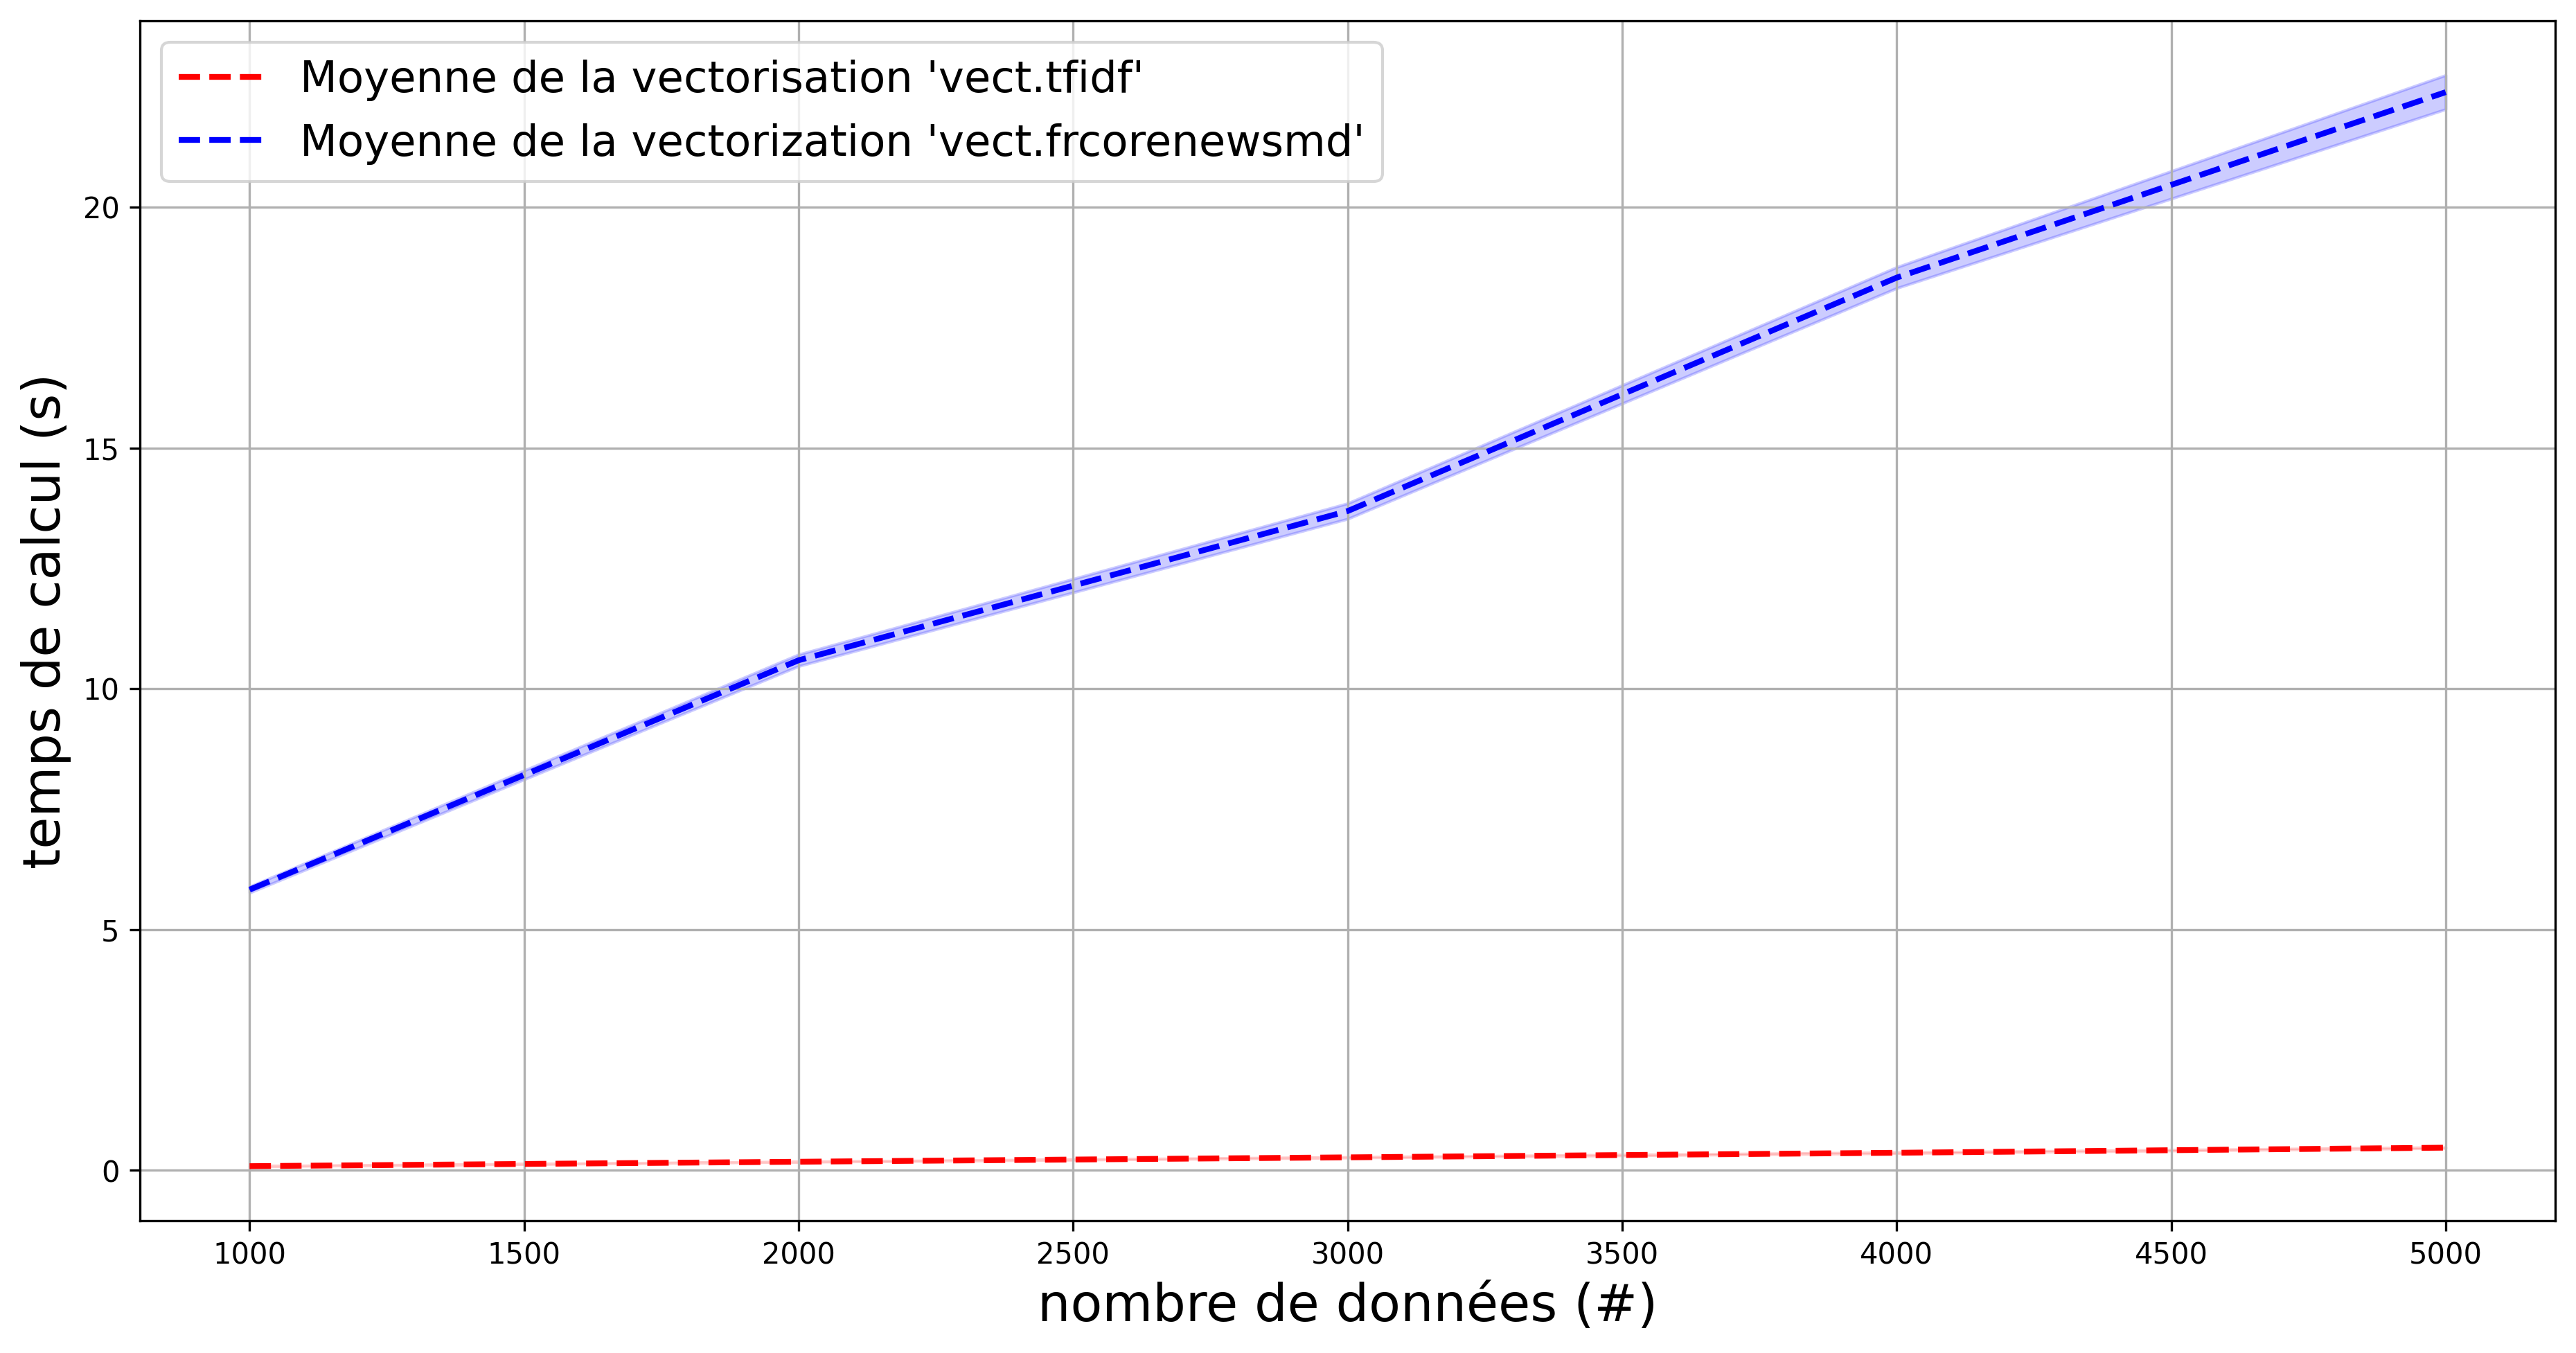

In [47]:
# Create a new figure.
fig_plot_vectorization: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_vectorization = fig_plot_vectorization.gca()

# Plot computation time for tfidf.
list_of_x = sorted(computation_time_of_vectorization_by_dataset_size["tfidf"].keys())
axis_plot_vectorization.plot(
    list_of_x,  # x
    [computation_time_of_vectorization_by_dataset_size["tfidf"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de la vectorisation 'vect.tfidf'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vectorization.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_vectorization_by_dataset_size["tfidf"][x]["MEAN"] - computation_time_of_vectorization_by_dataset_size["tfidf"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_vectorization_by_dataset_size["tfidf"][x]["MEAN"] + computation_time_of_vectorization_by_dataset_size["tfidf"][x]["SEM"]) for x in list_of_x],  # y2
        color="red",
        alpha=0.2,
    )

# Plot computation time for spacy.
list_of_x = sorted(computation_time_of_vectorization_by_dataset_size["spacy"].keys())
axis_plot_vectorization.plot(
    list_of_x,  # x
    [computation_time_of_vectorization_by_dataset_size["spacy"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de la vectorization 'vect.frcorenewsmd'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_vectorization.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_vectorization_by_dataset_size["spacy"][x]["MEAN"] - computation_time_of_vectorization_by_dataset_size["spacy"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_vectorization_by_dataset_size["spacy"][x]["MEAN"] + computation_time_of_vectorization_by_dataset_size["spacy"][x]["SEM"]) for x in list_of_x],  # y2
        color="blue",
        alpha=0.2,
    )

# Set axis name.
axis_plot_vectorization.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_vectorization.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_vectorization.legend(fontsize=15,)

# Plot the grid.
axis_plot_vectorization.grid(True)

In [48]:
# Store the graph.
fig_plot_vectorization.savefig(
    "../results/etude-temps-calcul-moyenne-2vectorization-par-nombre-donnes.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Case of _clustering_
> - algorithms: `kmeans_COP`, `hier_single`, `hier_complete`, `hier_average`, `hier_ward`, `spectral_SPEC`
> - factors: `dataset_size`, `previous_nb_constraints`, `algorithm_nb_clusters`

In [49]:
df_clustering = pd.read_csv("../results/experiments_synthesis_for_clustering.csv", sep=";")
df_clustering["time_total"] = df_clustering["time_total"].str.replace(",", ".").astype(float)
df_clustering.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,previous_nb_constraints,algorithm_name,algorithm_random_seed,algorithm_nb_clusters,time_start,time_stop,time_total
0,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,0,hier_average,1,10,1669766342,1669767048,706.108339
1,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,1000,hier_average,1,10,1669767302,1669767777,474.837071
2,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,1500,hier_average,1,10,1669767733,1669768149,416.317765
3,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,2000,hier_average,1,10,1669768104,1669768487,382.944872
4,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,2500,hier_average,1,10,1669768454,1669768777,322.408471


In [50]:
computation_time_of_clustering_by_dataset_size = {}
for clustering_algo_name in {"kmeans_COP", "hier_single", "hier_complete", "hier_average", "hier_ward", "spectral_SPEC"}:
    df_clustering_by_algo = df_clustering[df_clustering["algorithm_name"]==clustering_algo_name]
    dataset_sizes = sorted(df_clustering_by_algo["dataset_size"].unique().tolist())
    computation_time_of_clustering_by_dataset_size[clustering_algo_name] = {}
    for dataset_size in dataset_sizes:
        df_clustering_by_algo_by_size = df_clustering_by_algo[df_clustering_by_algo["dataset_size"]==dataset_size]
        computation_time_of_clustering_by_dataset_size[clustering_algo_name][dataset_size] = {}
        computation_time_of_clustering_by_dataset_size[clustering_algo_name][dataset_size]["MEAN"] = numpy.mean( df_clustering_by_algo_by_size["time_total"].tolist() )
        computation_time_of_clustering_by_dataset_size[clustering_algo_name][dataset_size]["SEM"] = scipystats.sem( df_clustering_by_algo_by_size["time_total"].tolist() )

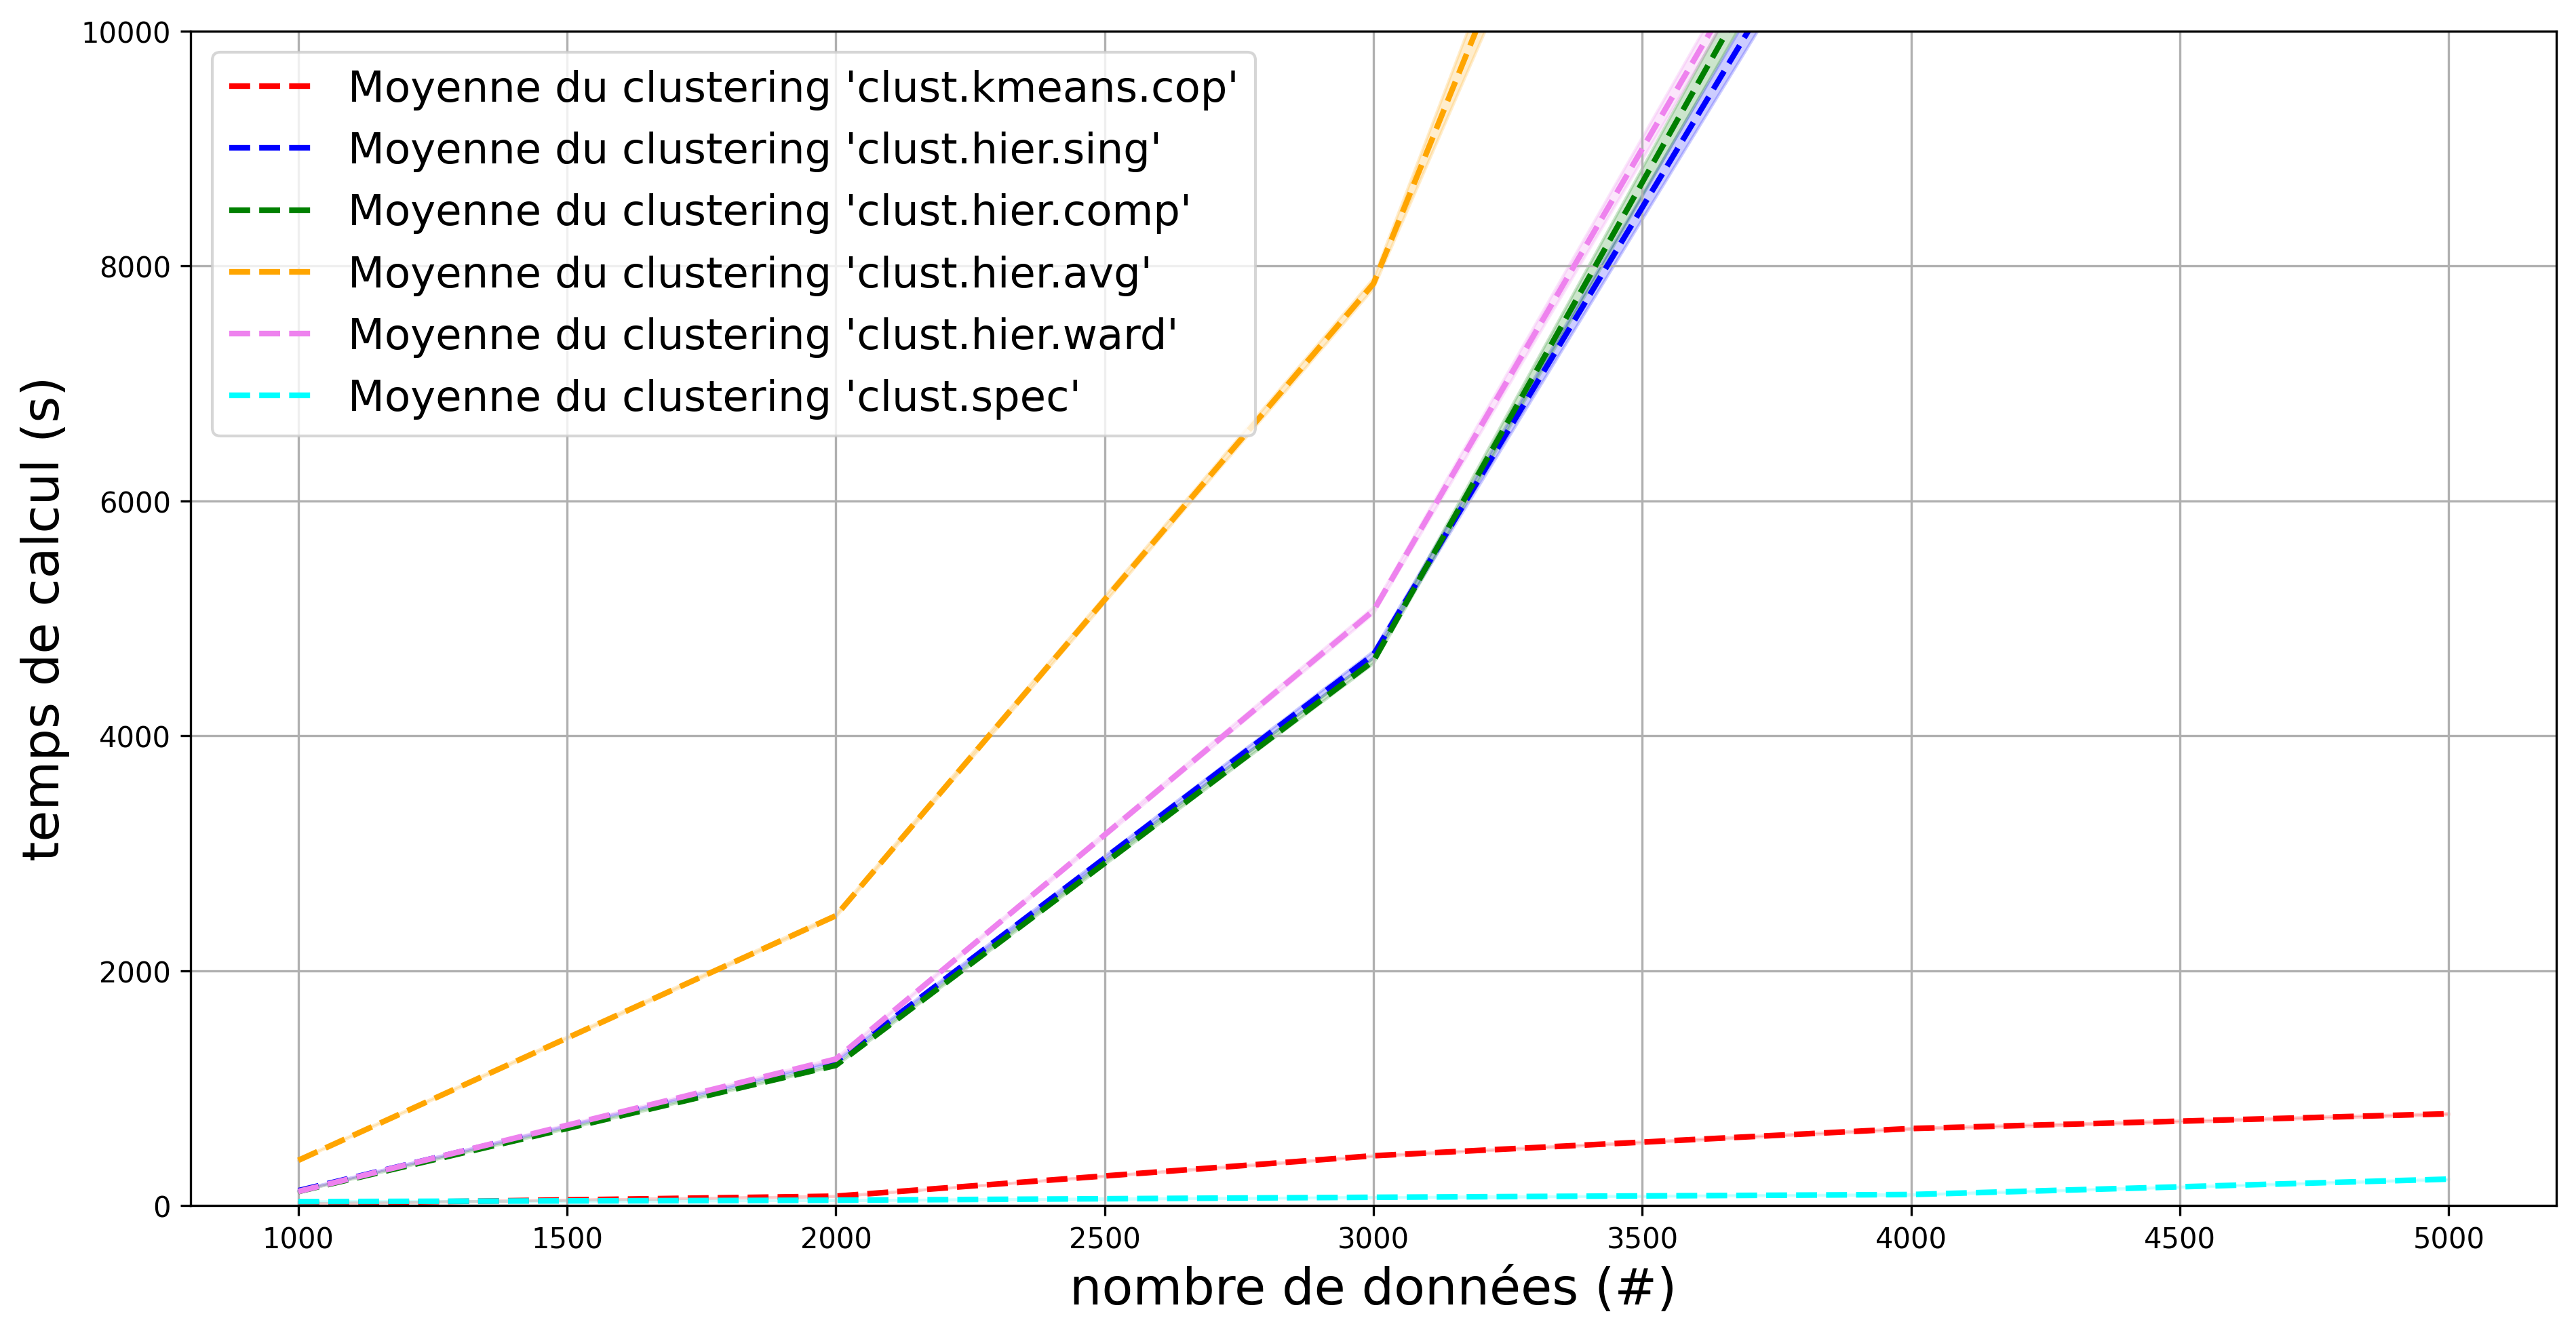

In [51]:
# Create a new figure.
fig_plot_clustering: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_clustering = fig_plot_clustering.gca()

# Set range of axis.
axis_plot_clustering.set_ylim(ymin=0, ymax=10000)

# Plot computation time for kmeans_COP.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["kmeans_COP"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["kmeans_COP"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.kmeans.cop'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["kmeans_COP"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["kmeans_COP"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["kmeans_COP"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["kmeans_COP"][x]["SEM"]) for x in list_of_x],  # y2
        color="red",
        alpha=0.2,
    )

# Plot computation time for hier_single.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["hier_single"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["hier_single"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.hier.sing'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["hier_single"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["hier_single"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["hier_single"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["hier_single"][x]["SEM"]) for x in list_of_x],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot computation time for hier_complete.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["hier_complete"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["hier_complete"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.hier.comp'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["hier_complete"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["hier_complete"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["hier_complete"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["hier_complete"][x]["SEM"]) for x in list_of_x],  # y2
        color="green",
        alpha=0.2,
    )

# Plot computation time for hier_average.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["hier_average"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["hier_average"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.hier.avg'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["hier_average"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["hier_average"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["hier_average"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["hier_average"][x]["SEM"]) for x in list_of_x],  # y2
        color="orange",
        alpha=0.2,
    )

# Plot computation time for hier_ward.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["hier_ward"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["hier_ward"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.hier.ward'",
    marker="",
    markerfacecolor="violet",
    markersize=3,
    color="violet",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["hier_ward"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["hier_ward"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["hier_ward"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["hier_ward"][x]["SEM"]) for x in list_of_x],  # y2
        color="violet",
        alpha=0.2,
    )

# Plot computation time for hier_ward.
list_of_x = sorted(computation_time_of_clustering_by_dataset_size["spectral_SPEC"].keys())
axis_plot_clustering.plot(
    list_of_x,  # x
    [computation_time_of_clustering_by_dataset_size["spectral_SPEC"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne du clustering 'clust.spec'",
    marker="",
    markerfacecolor="cyan",
    markersize=3,
    color="cyan",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_clustering.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_clustering_by_dataset_size["spectral_SPEC"][x]["MEAN"] - computation_time_of_clustering_by_dataset_size["spectral_SPEC"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_clustering_by_dataset_size["spectral_SPEC"][x]["MEAN"] + computation_time_of_clustering_by_dataset_size["spectral_SPEC"][x]["SEM"]) for x in list_of_x],  # y2
        color="cyan",
        alpha=0.2,
    )

# Set axis name.
axis_plot_clustering.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_clustering.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_clustering.legend(fontsize=15,)

# Plot the grid.
axis_plot_clustering.grid(True)

In [52]:
# Store the graph.
fig_plot_clustering.savefig(
    "../results/etude-temps-calcul-moyenne-3clustering-par-nombre-donnes.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

Case of _sampling_
> - algorithms: `random`, `in_same`, `farthest`, `closest`
> - factors: `dataset_size`, `previous_nb_constraints`, `previous_nb_clusters`, `algorithm_nb_to_select`

In [53]:
df_sampling = pd.read_csv("../results/experiments_synthesis_for_sampling.csv", sep=";")
df_sampling["time_total"] = df_sampling["time_total"].str.replace(",", ".").astype(float)
df_sampling.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,previous_nb_constraints,previous_nb_clusters,algorithm_name,algorithm_random_seed,algorithm_nb_to_select,time_start,time_stop,time_total
0,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,10,closest,1,100,1668608444,1668608445,1.140008
1,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,20,closest,1,100,1668608471,1668608472,1.220560
2,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,30,closest,1,100,1668608496,1668608497,1.208447
3,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,40,closest,1,100,1668608525,1668608526,1.234345
4,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,50,closest,1,100,1668608548,1668608549,1.198265


In [54]:
computation_time_of_sampling_by_dataset_size = {}
for sampling_algo_name in {"random", "in_same", "farthest", "closest"}:
    df_sampling_by_algo = df_sampling[df_sampling["algorithm_name"]==sampling_algo_name]
    dataset_sizes = sorted(df_sampling_by_algo["dataset_size"].unique().tolist())
    computation_time_of_sampling_by_dataset_size[sampling_algo_name] = {}
    for dataset_size in dataset_sizes:
        df_sampling_by_algo_by_size = df_sampling_by_algo[df_sampling_by_algo["dataset_size"]==dataset_size]
        computation_time_of_sampling_by_dataset_size[sampling_algo_name][dataset_size] = {}
        computation_time_of_sampling_by_dataset_size[sampling_algo_name][dataset_size]["MEAN"] = numpy.mean( df_sampling_by_algo_by_size["time_total"].tolist() )
        computation_time_of_sampling_by_dataset_size[sampling_algo_name][dataset_size]["SEM"] = scipystats.sem( df_sampling_by_algo_by_size["time_total"].tolist() )

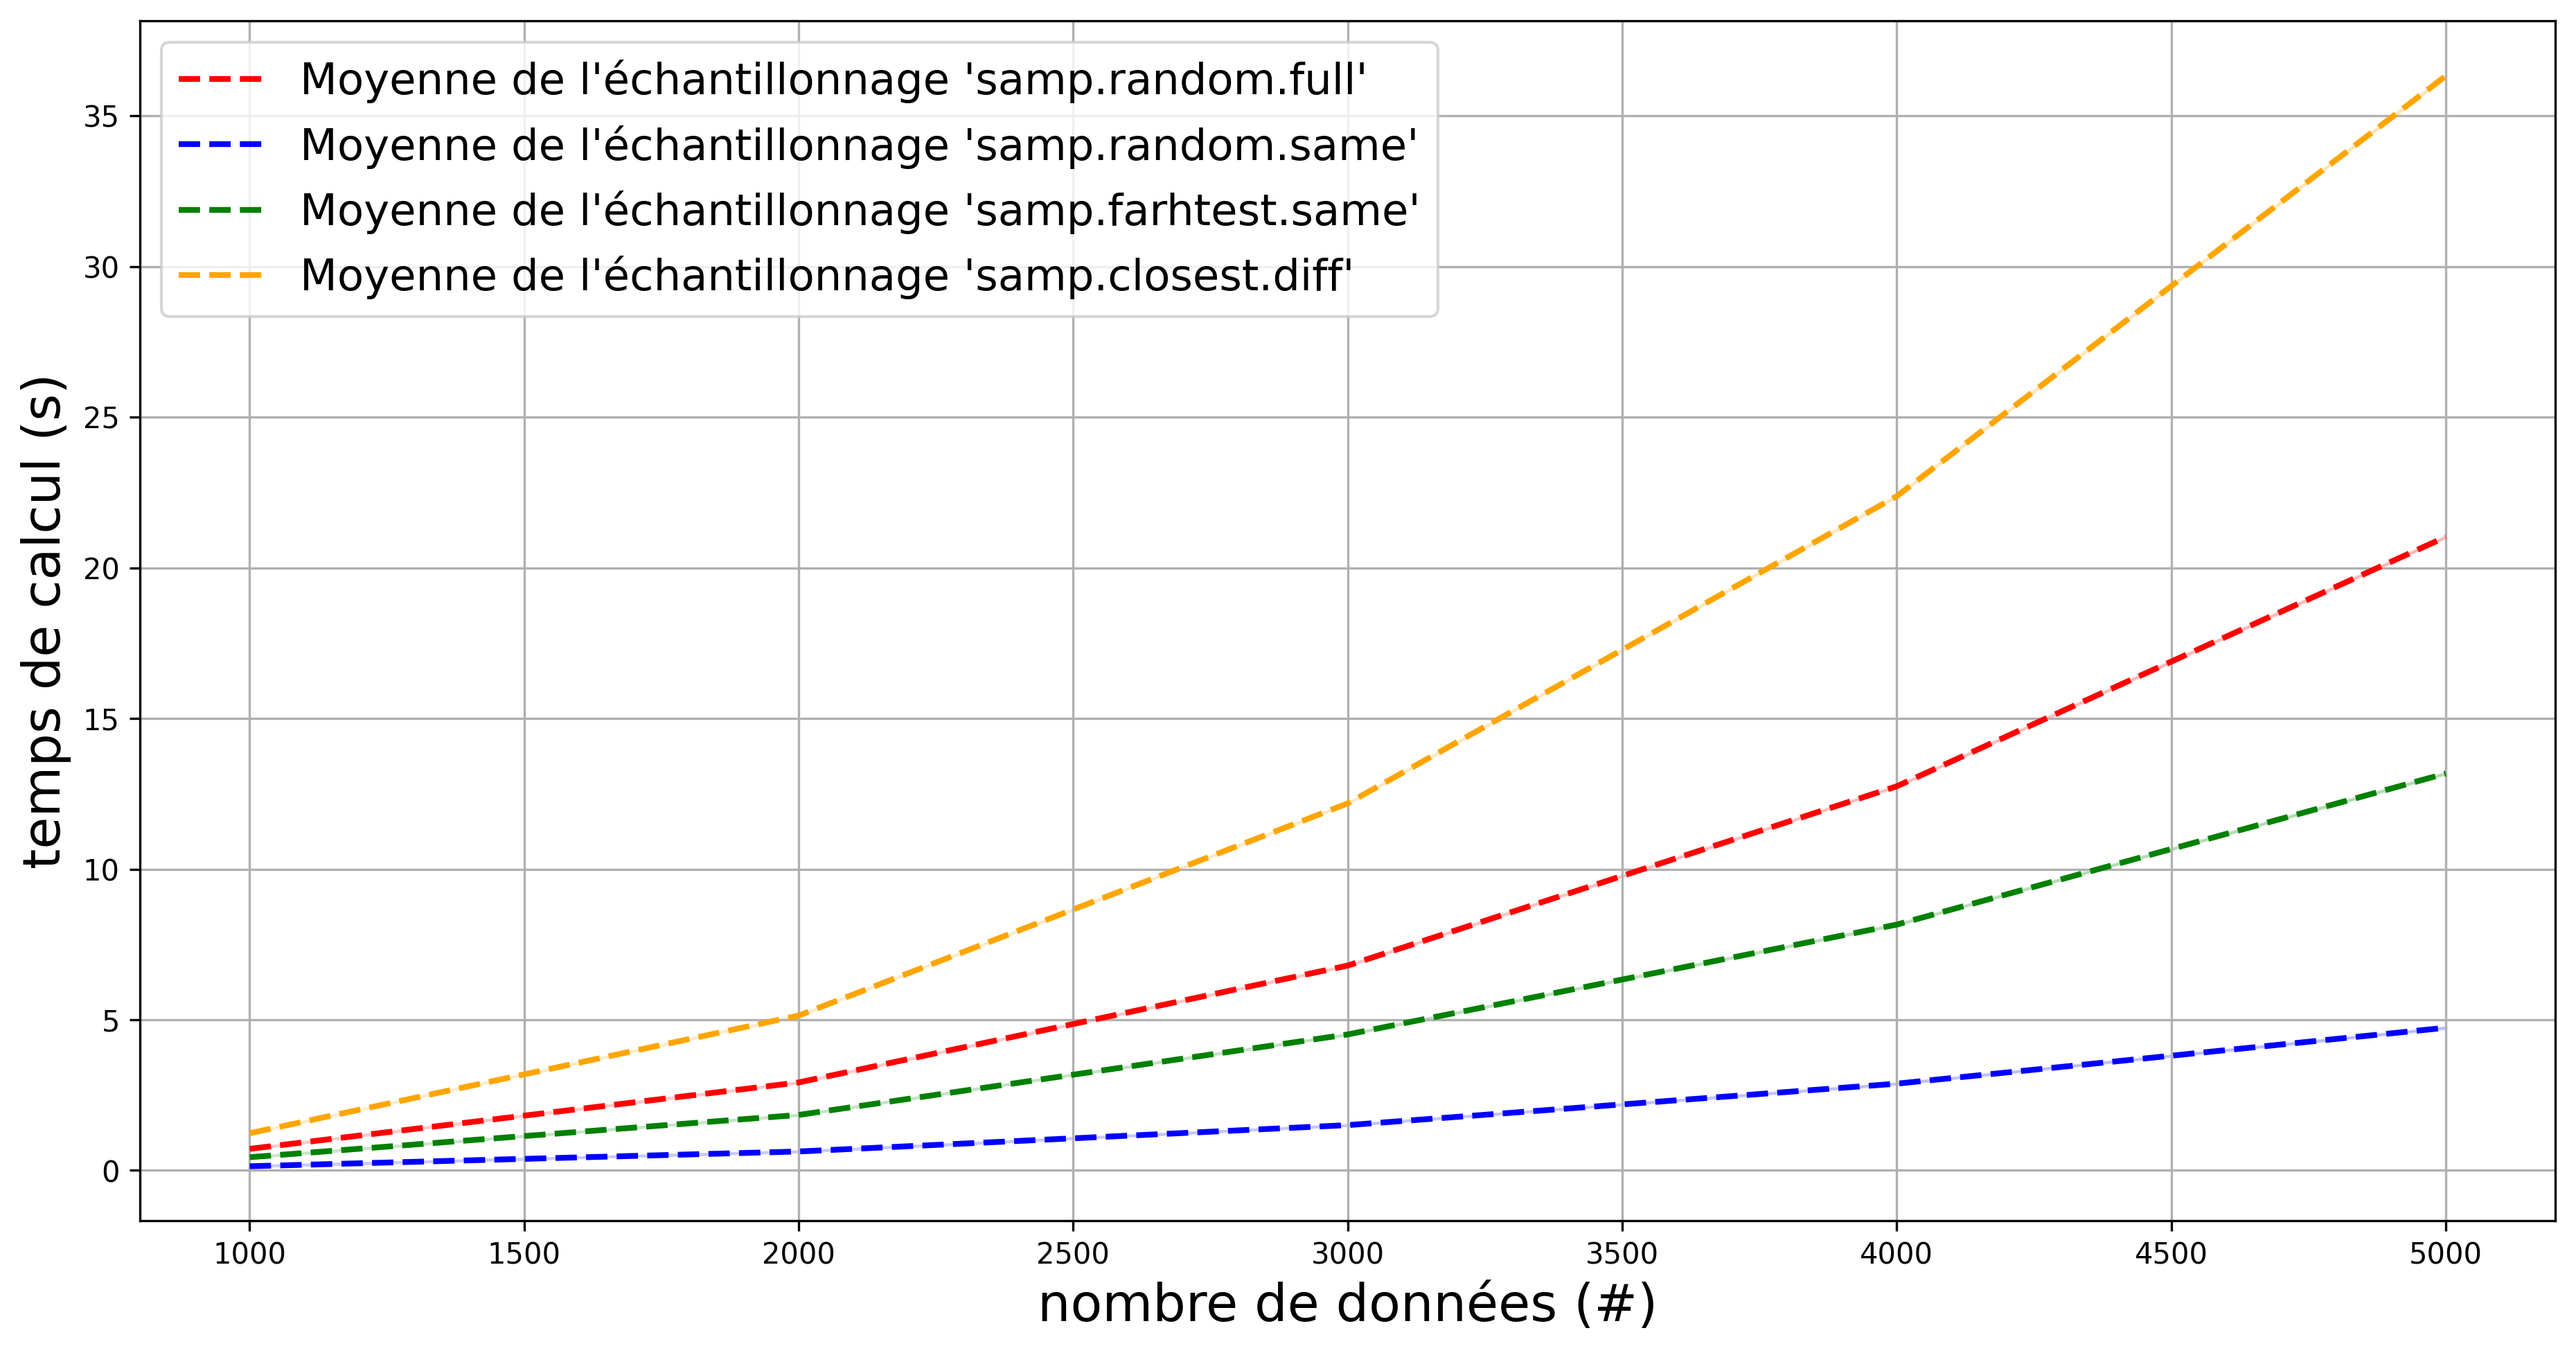

In [55]:
# Create a new figure.
fig_plot_sampling: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_sampling = fig_plot_sampling.gca()

# Plot computation time for random.
list_of_x = sorted(computation_time_of_sampling_by_dataset_size["random"].keys())
axis_plot_sampling.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_dataset_size["random"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.full'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_dataset_size["random"][x]["MEAN"] - computation_time_of_sampling_by_dataset_size["random"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_dataset_size["random"][x]["MEAN"] + computation_time_of_sampling_by_dataset_size["random"][x]["SEM"]) for x in list_of_x],  # y2
        color="red",
        alpha=0.2,
    )

# Plot computation time for in_same.
list_of_x = sorted(computation_time_of_sampling_by_dataset_size["in_same"].keys())
axis_plot_sampling.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_dataset_size["in_same"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.same'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_dataset_size["in_same"][x]["MEAN"] - computation_time_of_sampling_by_dataset_size["in_same"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_dataset_size["in_same"][x]["MEAN"] + computation_time_of_sampling_by_dataset_size["in_same"][x]["SEM"]) for x in list_of_x],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot computation time for farthest.
list_of_x = sorted(computation_time_of_sampling_by_dataset_size["farthest"].keys())
axis_plot_sampling.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_dataset_size["farthest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.farhtest.same'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_dataset_size["farthest"][x]["MEAN"] - computation_time_of_sampling_by_dataset_size["farthest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_dataset_size["farthest"][x]["MEAN"] + computation_time_of_sampling_by_dataset_size["farthest"][x]["SEM"]) for x in list_of_x],  # y2
        color="green",
        alpha=0.2,
    )

# Plot computation time for closest.
list_of_x = sorted(computation_time_of_sampling_by_dataset_size["closest"].keys())
axis_plot_sampling.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_dataset_size["closest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.closest.diff'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_dataset_size["closest"][x]["MEAN"] - computation_time_of_sampling_by_dataset_size["closest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_dataset_size["closest"][x]["MEAN"] + computation_time_of_sampling_by_dataset_size["closest"][x]["SEM"]) for x in list_of_x],  # y2
        color="orange",
        alpha=0.2,
    )


# Set axis name.
axis_plot_sampling.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_sampling.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_sampling.legend(fontsize=15,)

# Plot the grid.
axis_plot_sampling.grid(True)

In [56]:
# Store the graph.
fig_plot_sampling.savefig(
    "../results/etude-temps-calcul-moyenne-4sampling-par-nombre-donnes.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

In [57]:
computation_time_of_sampling_by_previous_nb_constraints = {}
for sampling_algo_name in {"random", "in_same", "farthest", "closest"}:
    df_sampling_by_algo = df_sampling[df_sampling["algorithm_name"]==sampling_algo_name]
    list_of_previous_nb_constraints = sorted(df_sampling_by_algo["previous_nb_constraints"].unique().tolist())
    computation_time_of_sampling_by_previous_nb_constraints[sampling_algo_name] = {}
    for previous_nb_constraints in list_of_previous_nb_constraints:
        df_sampling_by_algo_by_previous_nb_constraints = df_sampling_by_algo[df_sampling_by_algo["previous_nb_constraints"]==previous_nb_constraints]
        computation_time_of_sampling_by_previous_nb_constraints[sampling_algo_name][previous_nb_constraints] = {}
        computation_time_of_sampling_by_previous_nb_constraints[sampling_algo_name][previous_nb_constraints]["MEAN"] = numpy.mean( df_sampling_by_algo_by_previous_nb_constraints["time_total"].tolist() )
        computation_time_of_sampling_by_previous_nb_constraints[sampling_algo_name][previous_nb_constraints]["SEM"] = scipystats.sem( df_sampling_by_algo_by_previous_nb_constraints["time_total"].tolist() )

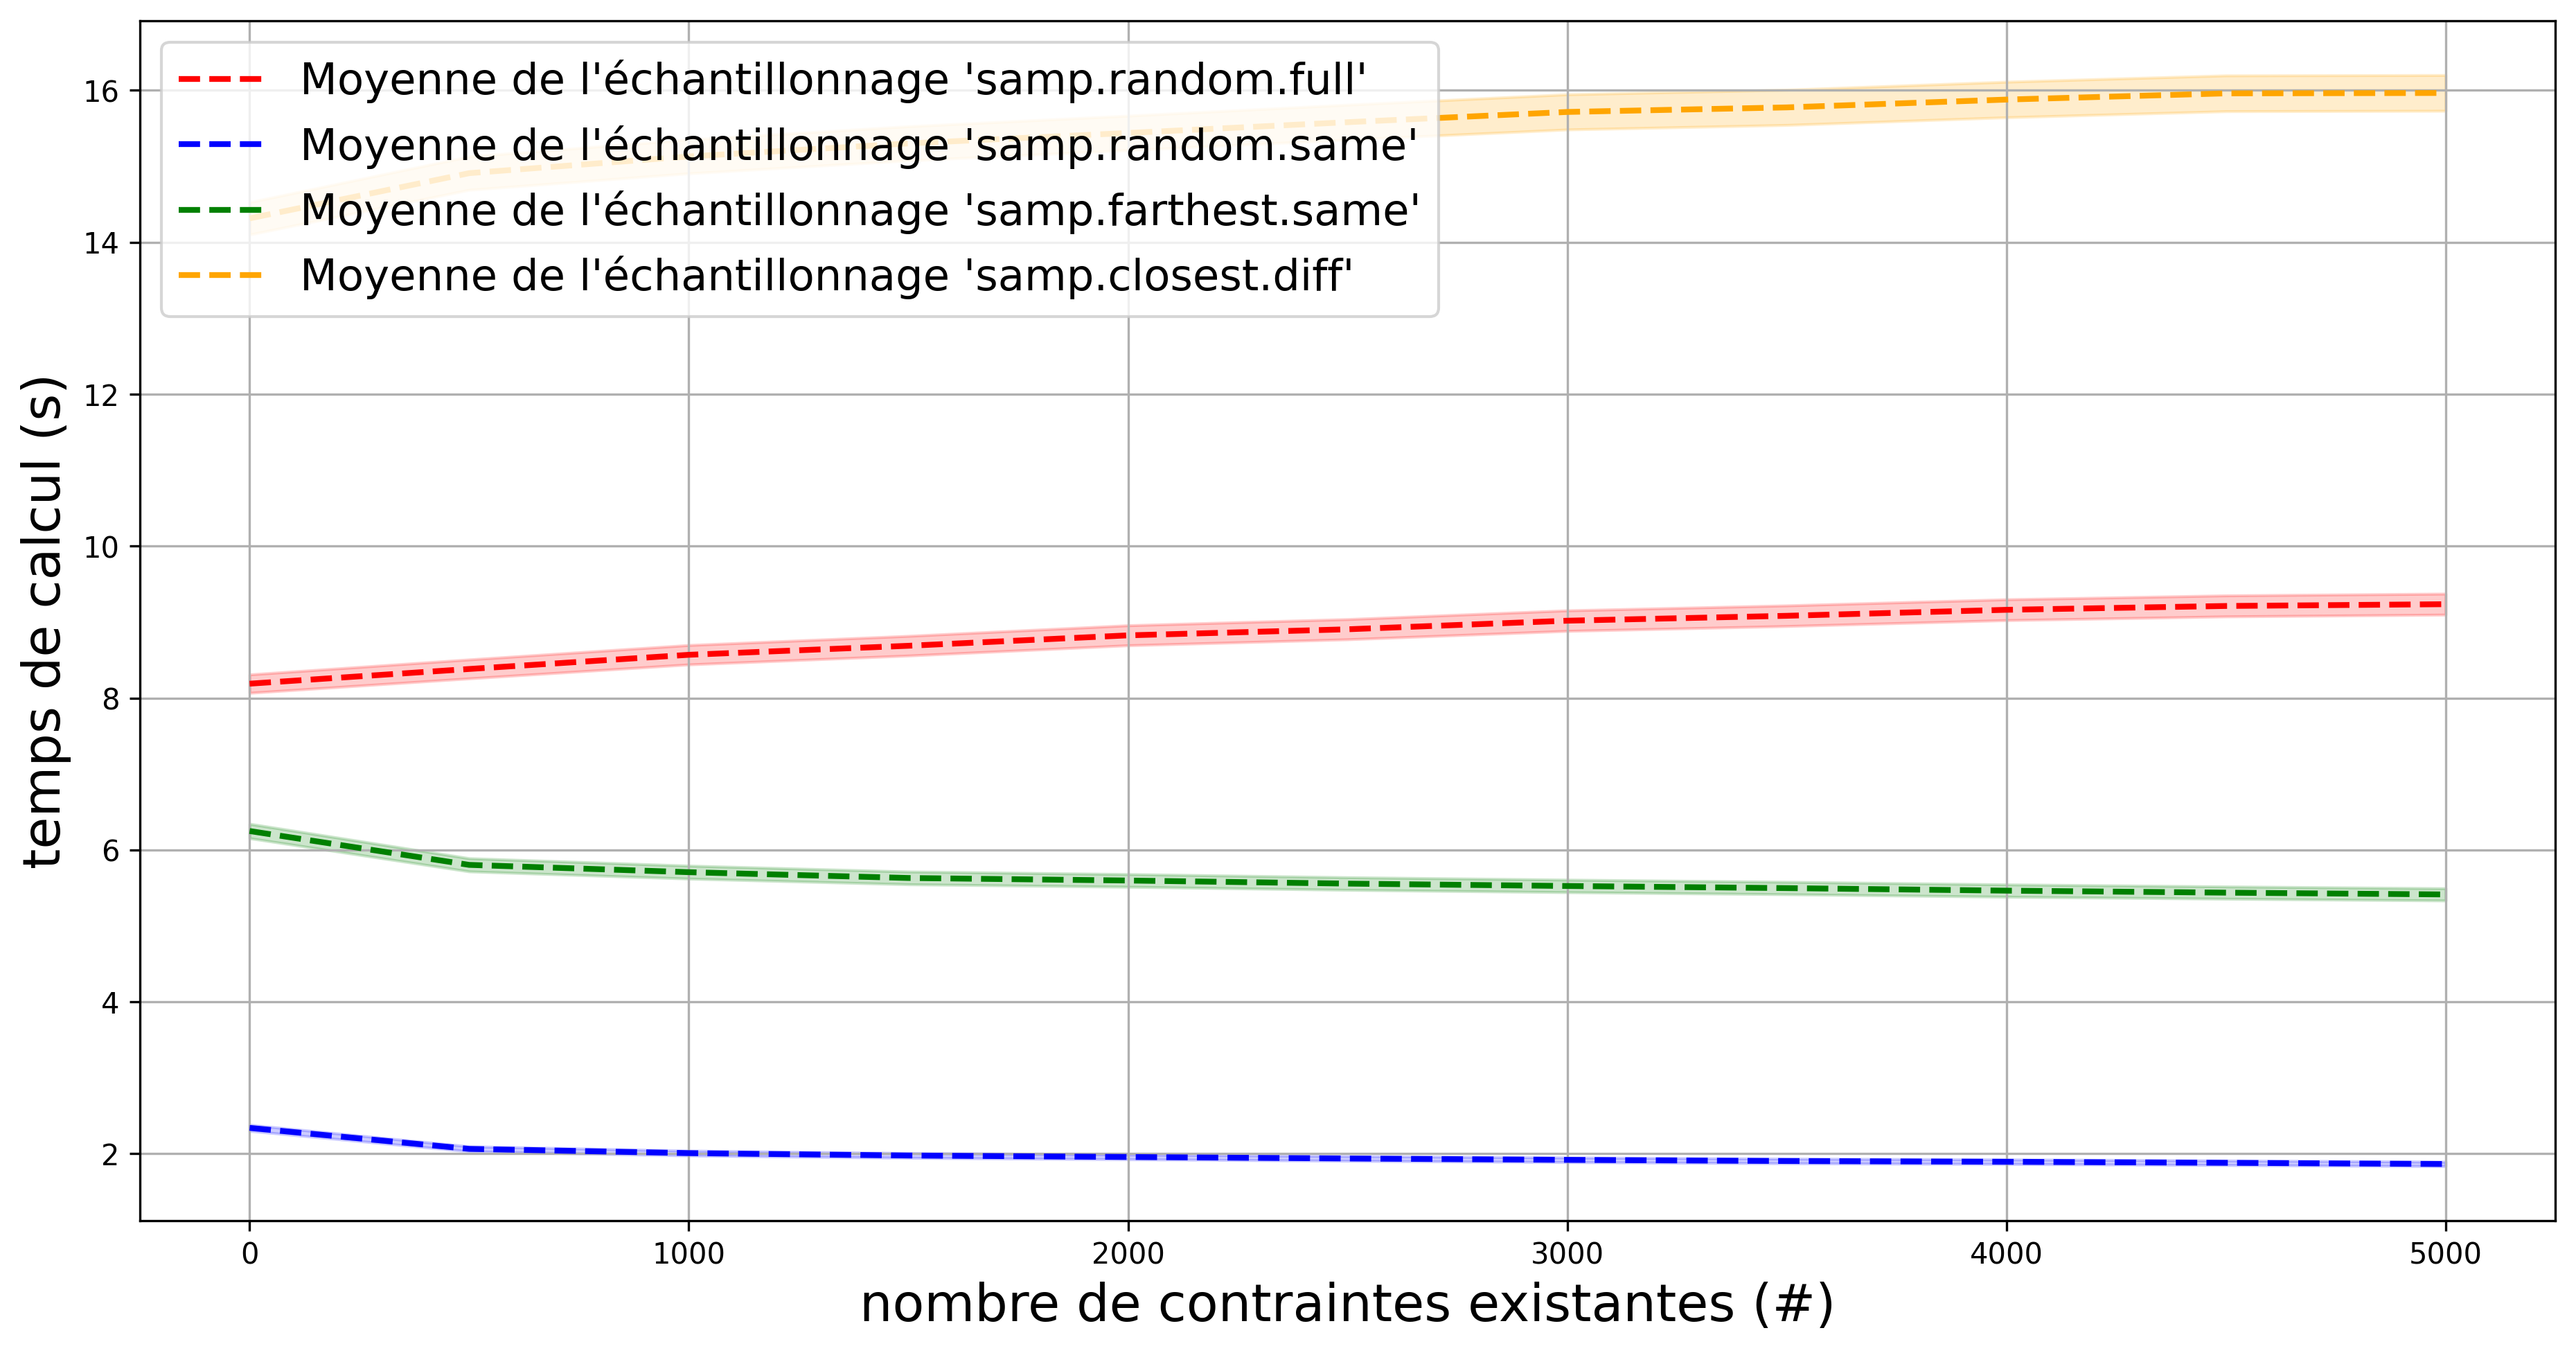

In [60]:
# Create a new figure.
fig_plot_sampling2: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_sampling2 = fig_plot_sampling2.gca()

# Plot computation time for random.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_constraints["random"].keys())
axis_plot_sampling2.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_constraints["random"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.full'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling2.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_constraints["random"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_constraints["random"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_constraints["random"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_constraints["random"][x]["SEM"]) for x in list_of_x],  # y2
        color="red",
        alpha=0.2,
    )

# Plot computation time for in_same.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_constraints["in_same"].keys())
axis_plot_sampling2.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_constraints["in_same"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.same'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling2.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_constraints["in_same"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_constraints["in_same"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_constraints["in_same"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_constraints["in_same"][x]["SEM"]) for x in list_of_x],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot computation time for farthest.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_constraints["farthest"].keys())
axis_plot_sampling2.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_constraints["farthest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.farthest.same'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling2.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_constraints["farthest"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_constraints["farthest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_constraints["farthest"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_constraints["farthest"][x]["SEM"]) for x in list_of_x],  # y2
        color="green",
        alpha=0.2,
    )

# Plot computation time for farthest.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_constraints["closest"].keys())
axis_plot_sampling2.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_constraints["closest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.closest.diff'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling2.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_constraints["closest"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_constraints["closest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_constraints["closest"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_constraints["closest"][x]["SEM"]) for x in list_of_x],  # y2
        color="orange",
        alpha=0.2,
    )

# Set axis name.
axis_plot_sampling2.set_xlabel("nombre de contraintes existantes (#)", fontsize=18,)
axis_plot_sampling2.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_sampling2.legend(fontsize=15, loc="upper left")

# Plot the grid.
axis_plot_sampling2.grid(True)

In [61]:
# Store the graph.
fig_plot_sampling2.savefig(
    "../results/etude-temps-calcul-moyenne-4sampling-par-nombre-contraintes-existantes.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)

In [62]:
computation_time_of_sampling_by_previous_nb_clusters = {}
for sampling_algo_name in {"random", "in_same", "farthest", "closest"}:
    df_sampling_by_algo = df_sampling[df_sampling["algorithm_name"]==sampling_algo_name]
    list_of_previous_nb_clusters = sorted(df_sampling_by_algo["previous_nb_clusters"].unique().tolist())
    computation_time_of_sampling_by_previous_nb_clusters[sampling_algo_name] = {}
    for previous_nb_clusters in list_of_previous_nb_clusters:
        df_sampling_by_algo_by_previous_nb_clusters = df_sampling_by_algo[df_sampling_by_algo["previous_nb_clusters"]==previous_nb_clusters]
        computation_time_of_sampling_by_previous_nb_clusters[sampling_algo_name][previous_nb_clusters] = {}
        computation_time_of_sampling_by_previous_nb_clusters[sampling_algo_name][previous_nb_clusters]["MEAN"] = numpy.mean( df_sampling_by_algo_by_previous_nb_clusters["time_total"].tolist() )
        computation_time_of_sampling_by_previous_nb_clusters[sampling_algo_name][previous_nb_clusters]["SEM"] = scipystats.sem( df_sampling_by_algo_by_previous_nb_clusters["time_total"].tolist() )

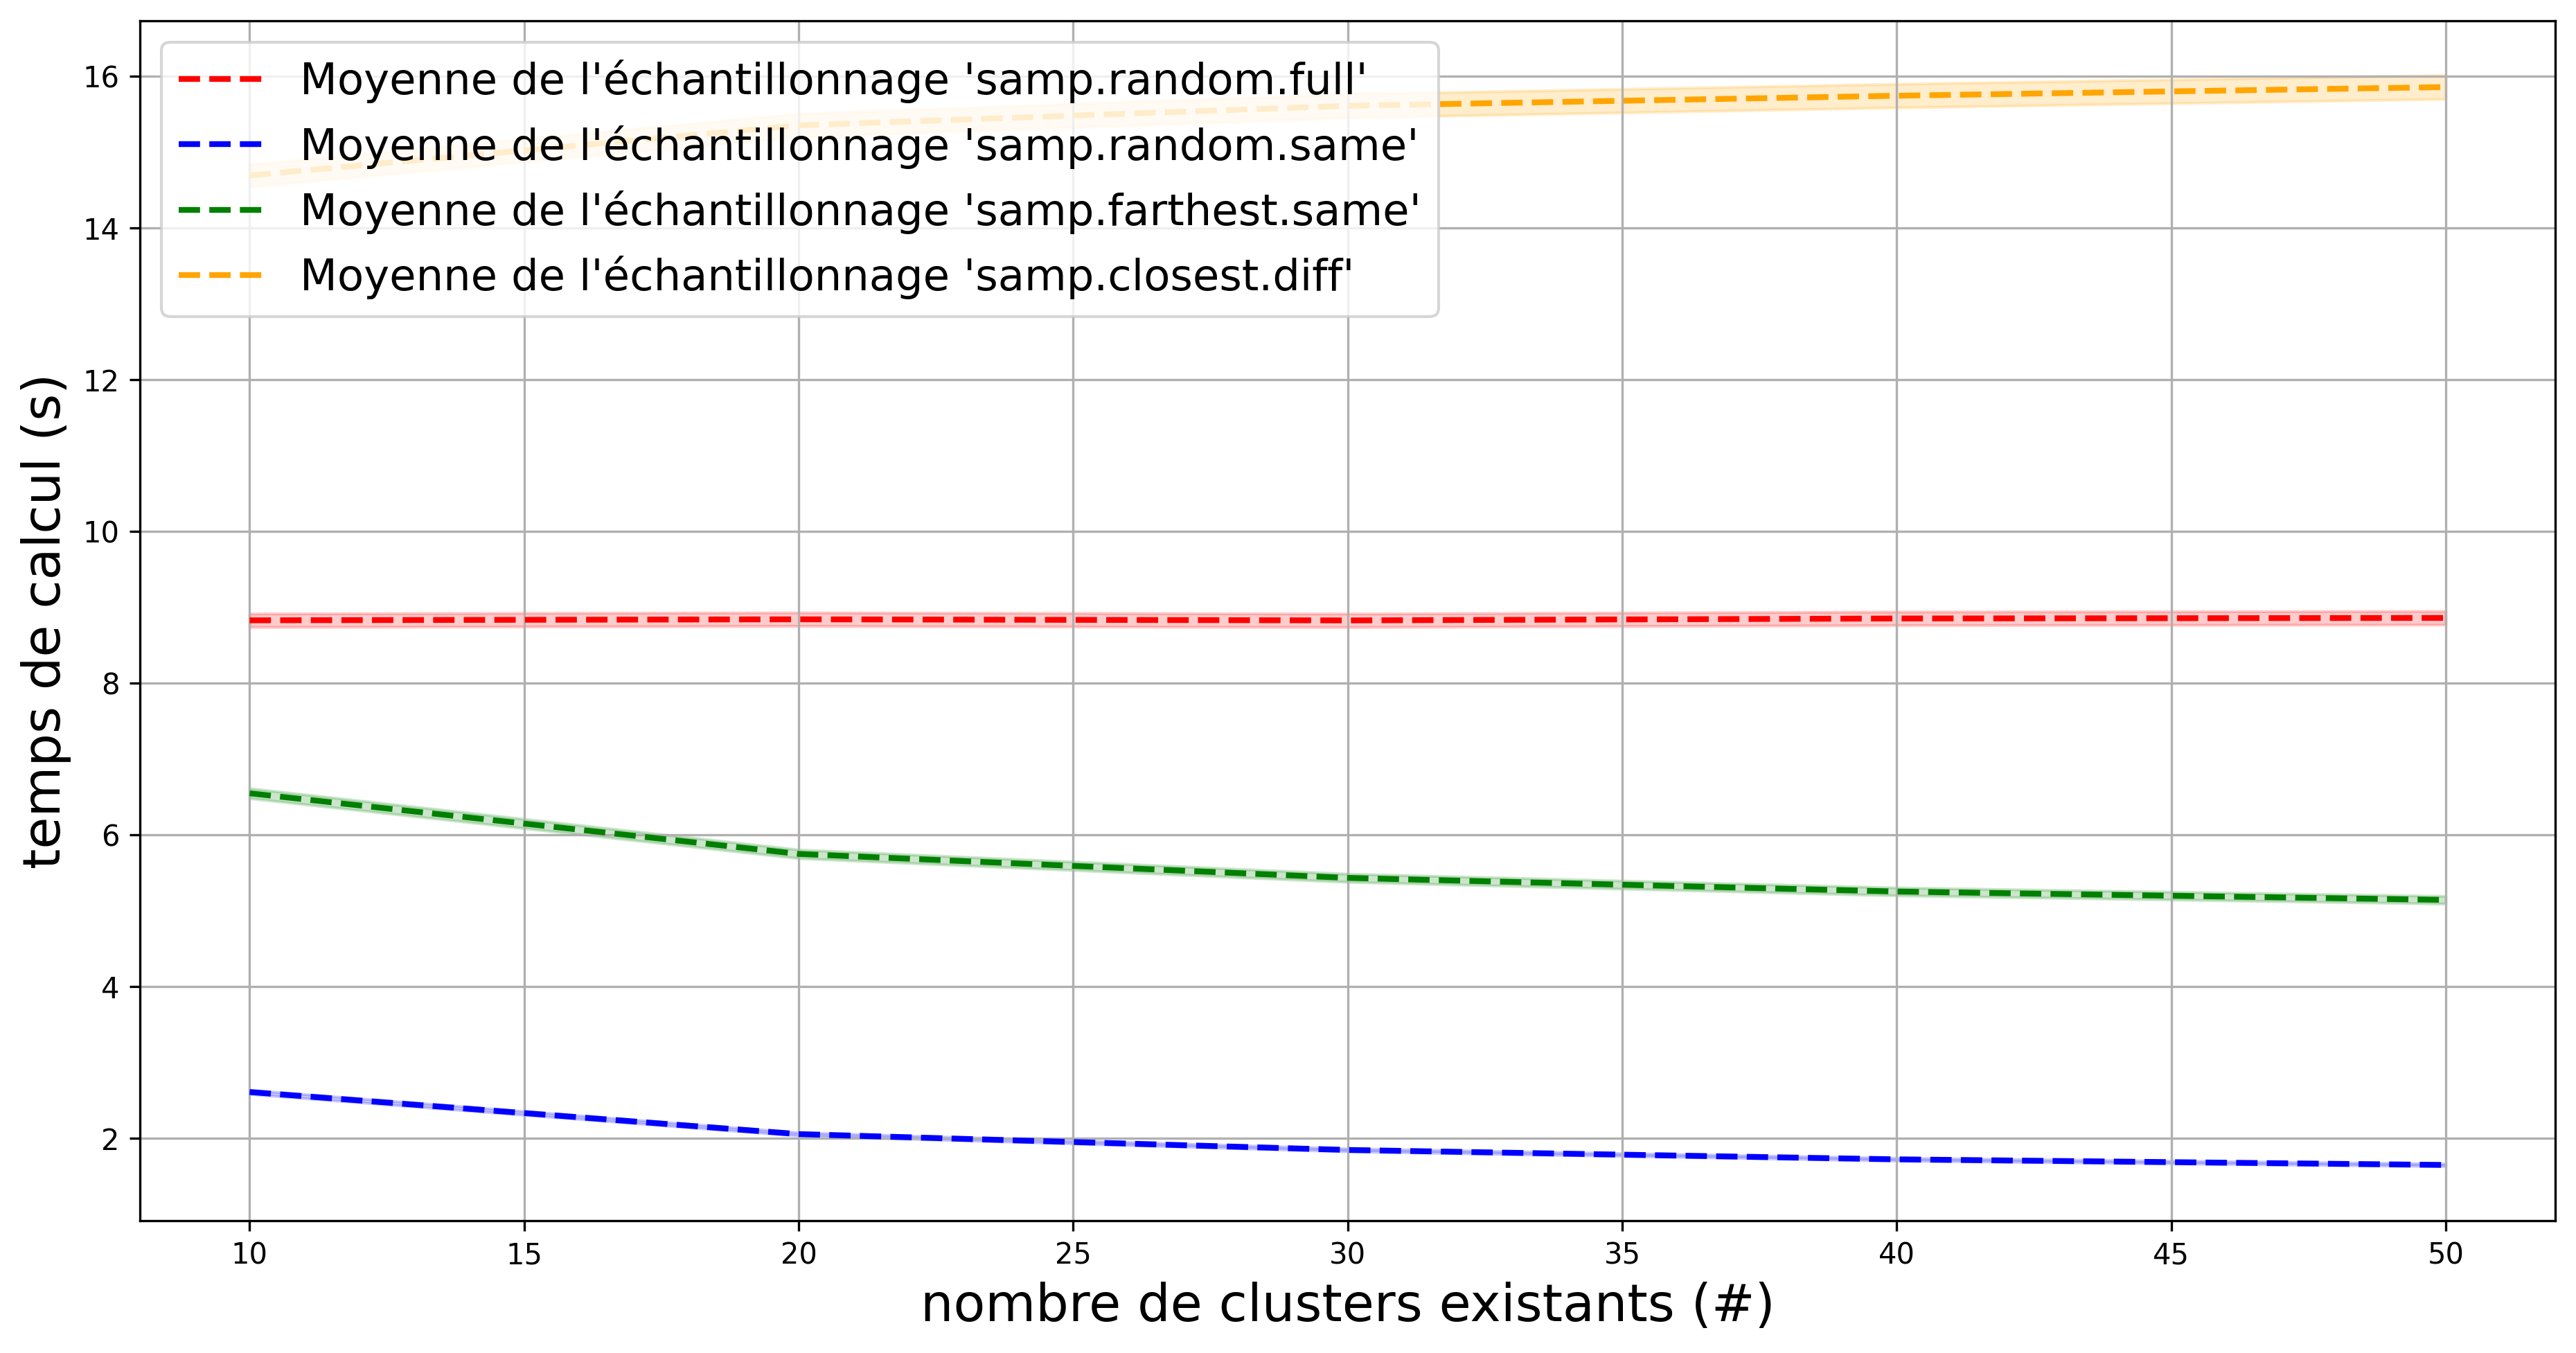

In [63]:
# Create a new figure.
fig_plot_sampling3: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_sampling3 = fig_plot_sampling3.gca()

# Plot computation time for random.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_clusters["random"].keys())
axis_plot_sampling3.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_clusters["random"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.full'",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling3.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_clusters["random"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_clusters["random"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_clusters["random"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_clusters["random"][x]["SEM"]) for x in list_of_x],  # y2
        color="red",
        alpha=0.2,
    )

# Plot computation time for in_same.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_clusters["in_same"].keys())
axis_plot_sampling3.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_clusters["in_same"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.random.same'",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling3.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_clusters["in_same"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_clusters["in_same"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_clusters["in_same"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_clusters["in_same"][x]["SEM"]) for x in list_of_x],  # y2
        color="blue",
        alpha=0.2,
    )

# Plot computation time for farthest.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_clusters["farthest"].keys())
axis_plot_sampling3.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_clusters["farthest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.farthest.same'",
    marker="",
    markerfacecolor="green",
    markersize=3,
    color="green",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling3.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_clusters["farthest"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_clusters["farthest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_clusters["farthest"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_clusters["farthest"][x]["SEM"]) for x in list_of_x],  # y2
        color="green",
        alpha=0.2,
    )

# Plot computation time for farthest.
list_of_x = sorted(computation_time_of_sampling_by_previous_nb_clusters["closest"].keys())
axis_plot_sampling3.plot(
    list_of_x,  # x
    [computation_time_of_sampling_by_previous_nb_clusters["closest"][x]["MEAN"] for x in list_of_x],  # y
    label="Moyenne de l'échantillonnage 'samp.closest.diff'",
    marker="",
    markerfacecolor="orange",
    markersize=3,
    color="orange",
    linewidth=2,
    linestyle="--",
)
if with_error_bars:
    axis_plot_sampling3.fill_between(
        x=list_of_x,  # x
        y1=[(computation_time_of_sampling_by_previous_nb_clusters["closest"][x]["MEAN"] - computation_time_of_sampling_by_previous_nb_clusters["closest"][x]["SEM"]) for x in list_of_x],  # y1
        y2=[(computation_time_of_sampling_by_previous_nb_clusters["closest"][x]["MEAN"] + computation_time_of_sampling_by_previous_nb_clusters["closest"][x]["SEM"]) for x in list_of_x],  # y2
        color="orange",
        alpha=0.2,
    )

# Set axis name.
axis_plot_sampling3.set_xlabel("nombre de clusters existants (#)", fontsize=18,)
axis_plot_sampling3.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_sampling3.legend(fontsize=15, loc="upper left",)

# Plot the grid.
axis_plot_sampling3.grid(True)

In [64]:
# Store the graph.
fig_plot_sampling3.savefig(
    "../results/etude-temps-calcul-moyenne-4sampling-par-nombre-clusters-existants.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)